## Demonstrate opening OMI HDF5 files from  NASA GES DISC

In [2]:
# Import Python packages (tools for working with geospatial data)
import rasterio 
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib notebook
%qtconsole

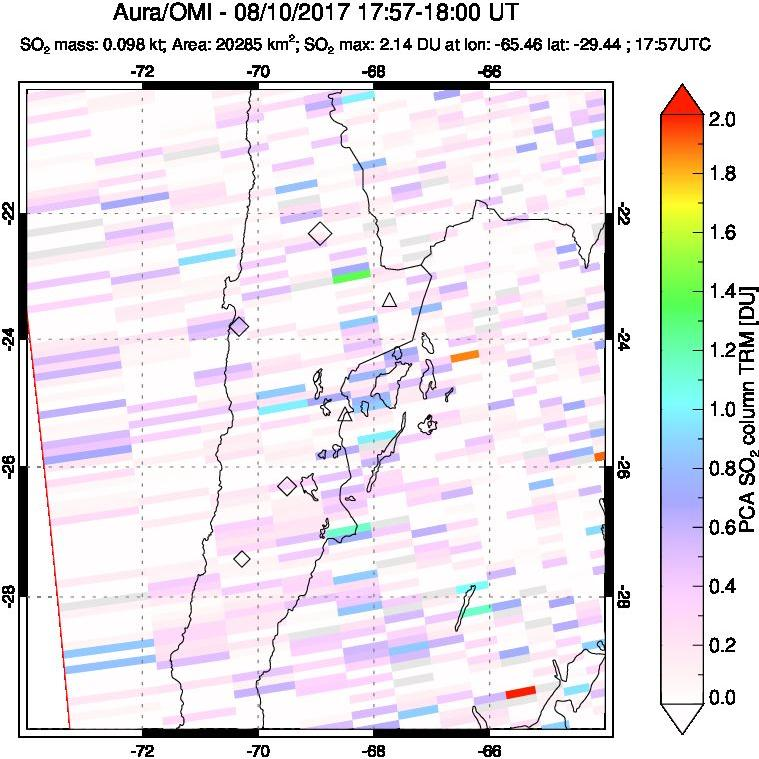

In [3]:
# Try to reproduce figure from SO2 omi page:
# https://so2.gsfc.nasa.gov
# https://so2.gsfc.nasa.gov/pix/daily/ixxxza/loopall5pca.php?yr=17&mo=08&dy=10&bn=nchile
from IPython.display import Image
Image("https://so2.gsfc.nasa.gov/pix/daily/0817/nchile_so2pca_5k_20170810.jpg")

## Get data

There are lots of places to get data. This website has a summary:
[https://disc.sci.gsfc.nasa.gov/datasets/OMSO2e_V003/summary](https://disc.sci.gsfc.nasa.gov/datasets/OMSO2e_V003/summary)

In [4]:
# Download a file from GES DISC. 

# GEt a level 2 file (note that the !wget calls the system command 'wget')
#!wget http://aura.gesdisc.eosdis.nasa.gov/data///Aura_OMI_Level2/OMSO2.003/2017/224/OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5

# Get a level 3 file
#!wget http://acdisc.gesdisc.eosdis.nasa.gov/data///Aura_OMI_Level3/OMSO2e.003/2017/OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5

In [4]:
!gdalinfo OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5 -nogcp

Driver: HDF5/Hierarchical Data Format Release 5
Files: OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5
Size is 512, 512
Coordinate System is `'
Metadata:
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_AuthorAffiliation=JCET/UMBC
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_AuthorName=N. Krotkov, K. Yang, S. Carn, A.J. Krueger (UMBC)
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleDay=12 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleMonth=8 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleYear=2017 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_InputVersions=OMSO2:0.1
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_InstrumentName=OMI
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_OrbitData=PREDICTED
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_PGEVERSION=0.1.7
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_ProcessingCenter=OMI SIPS
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_ProcessingHost=Linux minion7074 3.10.0-514.16.1.el7.x86_64 x86_64
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_ProcessLevel=2
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_TAI93At0zOfGranule=776649610 
  HDF

  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_Reflectivity331__FillValue=-1.2676506e+30 
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment_MissingValue=-1.2676506e+30 
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment_Offset=0 
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment_ScaleFactor=1 
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment_Title=N-Value Residual Adjustment
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment_UniqueFieldDefinition=TOMS-OMI-Shared
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment_Units=NoUnits
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment_ValidRange=-50 50 
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_ResidualAdjustment__FillValue=-1.2676506e+30 
  HDFEOS_SWATHS_OMI_Total_Column_Amount_SO2_Data_Fields_Residual_MissingValue=-1.2676506e+30 
  HDFEOS_SWATHS_OMI_T

## Read data with python

There are various ways to do this. "Rasterio" is a great library for working with geospatial raster imagery. Read more about it [here](https://mapbox.github.io/rasterio/#)

http://hdfeos.org/software/tool.php
Basic example: http://hdfeos.org/software/h5py.php

Advanced examples: http://hdfeos.org/zoo/index_openGESDISC_Examples.php

Other
http://scitools.org.uk/iris/
rasterio
xarray

In [5]:
# Level 2
filepath = "./OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5"
src = rasterio.open(filepath)

In [6]:
# So far we've just loaded the metadata of the file. Note rasterio doesn't seem to know how to deal with .he5 :()
src.meta

{'affine': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0),
 'count': 0,
 'crs': CRS({}),
 'driver': 'HDF5',
 'dtype': 'float_',
 'height': 512,
 'nodata': None,
 'transform': (0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 'width': 512}

In [7]:
rasterio.__version__

'0.36.0'

# NOTE: rasterio 0.36 doesn't seem to know how to deal with HDFEOS ... try other utilities, or convert format with an external tool before using

NOTE: Gdal translate doesn't handle this:
(omidemo) scott@omidemo:gdal_translate -of netCDF OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5 OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5.gdal.nc
Input file contains subdatasets. Please, select one of them for reading.

https://www.ncl.ucar.edu/Document/Tools/ncl_convert2nc.shtml

In fact there are a lot of tools and differences between HDF4, HDF5, NetCDF4 etc. So check out this summary table:
https://support.hdfgroup.org/tools/convert-netcdf.html


## HDF5-EOS to NetCDF4 compatibility
OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5
scott@test:ls -l OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5 
-rw-r--r--  1 scott  staff  5184638 Aug 13 14:50 OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5
scott@test:~/Software/aug_eos5 OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5 
OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5 has been successfully augmented.
scott@test:ls -ltr
total 10168
-rw-r--r--  1 scott  staff  5203518 Aug 13 14:50 OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5